# Introduction To Systems Biology Using PySB

Author: Nathan Wood - WEB: [www.nwoodweb.xyz](https://www.nwoodweb.xyz) 

## What is Systems Biology?

Systems Biology is an interdisciplinary biology field that seeks to take a more hollistic approach to gaining insight into biological function by combining experimental data with mathematical models, most commonly in the form of differential equations. Mathematical models that employ both ordinary and partial differentials and their systems allow for a myriad of biological processes to be experimented on computationally. Systems biology allows us to gain into how organs, tissues, and cells cooperate in a mechanistic sense, down to the genes expressed.

<img src="https://isbscience.org/wp-content/uploads/network-medicine-1024x538.jpg" 
     alt="Systems Biology, Courtesy Institute of Systems Biology" width="450"/>

## Introduction to PySB

### Installation
Installing pysb to your user environment is as easy as using ```pip```, though in some cases one may want to use ```pip install --user``` instead.

NOTE: Pysb may require BioNetGen for model analysis, which is preferably installed via ```conda```

In [368]:
!pip install pysb 
!conda install -y -q bionetgen # install bionetgen into conda environment, no stdout and assume yes to all prompt

Solving environment: ...working... done

# All requested packages already installed.



All PySB simulations must begin with the following:

In [399]:
from pysb import *
from pysb.macros import * 
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7efcc487cfd0>

`from pysb import *` loads the PySB module with all of its modules 


`Model()` initializes the model that we will be using. 

### Monomers and Annotations
In PySB, monomers represent the smallest objects in the observable system: proteins and other biomolecules, as well as biochemically relevant small molecules. Each acting element in the system needs to be initialized as a monomer. 

Annotations 

In [400]:
Monomer('carbanh', ['binding1'])
Monomer('coo', ['ligand','state'],
        {'state': ['free', 'bound','hydrate']})


Monomer('coo', ['ligand', 'state'], {'state': ['free', 'bound', 'hydrate']})

### Parameters
In PySB, specific constants are represented as parameters. Parameters are strictly numerical values and their specified names. Parameters include data such as reaction rates. 

In [401]:
Parameter('forwardRateBind', .037)
Parameter('reverseRateBind', .00001)
Parameter('rel', .037)

Parameter('rel', 0.037)

### Rules
Rules define chemical interactions between reactants, products, and their catalytic enzymes. Rules are quantified by parameters, mainly reaction rates.


Rules have a specific set of operators 

    - + represents the formation of complexes between monomers
    - | represents reversable reactions
    - >> represents irreversible reaction, that procede forward only
    - % represents binding between monomers



In [402]:
Rule('cooHydrate', carbanh(binding1=None) + coo(state='free', ligand=None) 
     >> carbanh(binding1=1) % coo(state='bound',ligand=1),forwardRateBind)
Rule('dissociate', carbanh(binding1=1) % coo(state='bound', ligand=1) 
     >> carbanh(binding1=None) + coo(state='hydrate',ligand=None), rel)

Rule('dissociate', carbanh(binding1=1) % coo(ligand=1, state='bound') >> carbanh(binding1=None) + coo(ligand=None, state='hydrate'), rel)

In [403]:
c = 1.5e-3 * 6.22e23 
Parameter('Hemo_0', 100)
Parameter('coo_0', c)
Parameter('carbonic_0',0)
Initial(carbanh(binding1=None), Hemo_0)
#Initial(hemoglobin(bind1=None), HemoBound_0)
Initial(coo(ligand=None, state='free'), coo_0)
Initial(coo(ligand=None, state='hydrate'), carbonic_0)

Initial(coo(ligand=None, state='hydrate'), carbonic_0)

### Observables 

In order to have data to make sense of our computational models, we need to define observables. Observables can include:

    - Output compounds, such as Carbonate produced as the result of Carbon Dioxide being turned over by Carbonic Anhydrase
    

In [404]:
Observable('totalEnzyme', carbanh())
Observable('free', carbanh(binding1=None))
Observable('substrate', coo(ligand=None, state='free'))
Observable('product', coo(ligand=None, state='hydrate'))


Observable('product', coo(ligand=None, state='hydrate'))

2022-06-29 23:21:55.411 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing the 'cython' package for compiling the ODEs to C code. This warning can be suppressed by specifying compiler='python'.


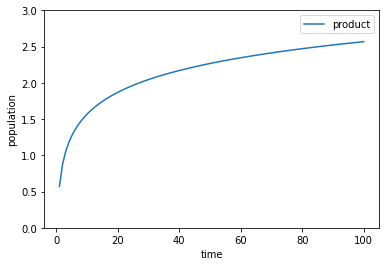

In [455]:
import numpy as np
from pysb.integrate import odesolve
from pysb.simulator import ScipyOdeSimulator
import matplotlib.pyplot as plt


tspan = np.linspace(0, 100, 100)
y = ScipyOdeSimulator(model, tspan).run()

#plt.plot(tspan, y['substrate'], label="substrate")
#plt.plot(tspan, y['totalEnzyme'], label="e_total")
#plt.plot(tspan, y['free'], label="free")
#plt.plot(tspan,np.log10(y['substrate']), label="substrate")
plt.plot(tspan, np.log10(y.observables['product']), label="product")
#plt.plot(tspan, y['totalBoundEnzyme'], label="e_free")
plt.xlabel('time')
plt.ylabel('population')
plt.ylim(0,3)
plt.legend(loc=0)
plt.show()

#### All Previous Work Combined


2022-06-29 23:10:45.596 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing the 'cython' package for compiling the ODEs to C code. This warning can be suppressed by specifying compiler='python'.


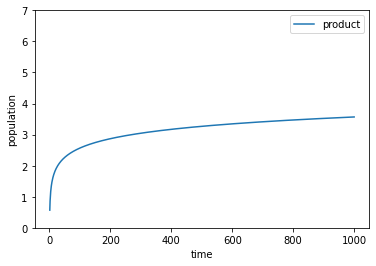

In [445]:
from pysb.macros import catalyze_state
Model()
Monomer('carbanh', ['binding1'])
Monomer('coo', ['ligand','state'],
        {'state': ['free','hydrate']})
Parameter('forwardRateBind', .037)
Parameter('reverseRateBind', .00001)
Parameter('rel', .037)
Rule('cooHydrate', carbanh(binding1=None) + coo(state='free', ligand=None) 
     >> carbanh(binding1=1) % coo(state='hydrate',ligand=1),forwardRateBind)
Rule('dissociate', carbanh(binding1=1) % coo(state='hydrate', ligand=1) 
     >> carbanh(binding1=None) + coo(state='hydrate',ligand=None), rel)

c = 1.5e-3 * 6.22e23 
Parameter('Hemo_0', 100)
Parameter('coo_0', c)
Parameter('carbonic_0',0)
Initial(carbanh(binding1=None), Hemo_0)
#Initial(hemoglobin(bind1=None), HemoBound_0)
Initial(coo(ligand=None, state='free'), coo_0)
Initial(coo(ligand=None, state='hydrate'), carbonic_0)

Observable('totalEnzyme', carbanh())
Observable('free', carbanh(binding1=None))
Observable('substrate', coo(ligand=None, state='free'))
Observable('product', coo(ligand=None, state='hydrate'))

tspan = np.linspace(0, 1000, 1000)
y = odesolve(model, tspan)

#plt.plot(tspan, y['substrate'], label="substrate")
#plt.plot(tspan, y['totalEnzyme'], label="e_total")
#plt.plot(tspan, y['free'], label="free")
#plt.plot(tspan,np.log10(y['substrate']), label="substrate")
plt.plot(tspan, np.log10(y['product']), label="product")
#plt.plot(tspan, y['totalBoundEnzyme'], label="e_free")
plt.xlabel('time')
plt.ylabel('population')
plt.ylim(0,7)
plt.legend(loc=0)
plt.show()


### Modeling Effects of Inhibitors on Michaelis Menten Kinetics 

<b>This model has been modified and was originally from [kinase_cascade.py](https://github.com/pysb/pysb/blob/master/pysb/examples/kinase_cascade.py) and [run_kinase_cascade.py](https://github.com/pysb/pysb/blob/master/pysb/examples/run_kinase_cascade.py) from the original PySB [Github repository](https://github.com/pysb)</b>

Automatically created module for IPython interactive environment 
 <Model '_interactive_' (monomers: 6, rules: 20, parameters: 36, expressions: 0, compartments: 0) at 0x7efcc4cbae50>

NOTE: This model code is designed to be imported and programatically
manipulated, not executed directly. The above output is merely a
diagnostic aid.
Simulating...


2022-06-30 13:01:07.373 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing the 'cython' package for compiling the ODEs to C code. This warning can be suppressed by specifying compiler='python'.


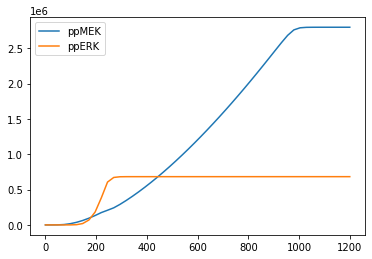

In [456]:

Model()

Monomer('Ras', ['k'])
Annotation(Ras, 'http://identifiers.org/uniprot/P01116', 'hasPart')
Annotation(Ras, 'http://identifiers.org/uniprot/P01112', 'hasPart')
Annotation(Ras, 'http://identifiers.org/uniprot/P01111', 'hasPart')
Monomer('Raf', ['s', 'k'], {'s': ['u', 'p']})
Annotation(Raf, 'http://identifiers.org/uniprot/P15056', 'hasPart')
Annotation(Raf, 'http://identifiers.org/uniprot/P04049', 'hasPart')
Annotation(Raf, 'http://identifiers.org/uniprot/P10398', 'hasPart')
Monomer('MEK', ['s218', 's222', 'k'], {'s218': ['u', 'p'], 's222': ['u', 'p']})
Annotation(MEK, 'http://identifiers.org/uniprot/Q02750', 'hasPart')
Annotation(MEK, 'http://identifiers.org/uniprot/P36507', 'hasPart')
Monomer('ERK', ['t185', 'y187'], {'t185': ['u', 'p'], 'y187': ['u', 'p']})
Annotation(ERK, 'http://identifiers.org/uniprot/P27361', 'hasPart')
Annotation(ERK, 'http://identifiers.org/uniprot/P28482', 'hasPart')
Monomer('PP2A', ['ppt'])
Annotation(PP2A, 'http://identifiers.org/mesh/24544')
Monomer('MKP', ['ppt'])
Annotation(MKP, 'http://identifiers.org/mesh/24536')

# Use generic rates for forward/reverse binding and kinase/phosphatase catalysis
kf_bind = 1e-5
kr_bind = 1e-1
kcat_phos = 1e-1
kcat_dephos = 3e-3

# Build handy rate "sets"
klist_bind = [kf_bind, kr_bind]
klist_phos = klist_bind + [kcat_phos]
klist_dephos = klist_bind + [kcat_dephos]

def mapk_single(kinase, pptase, substrate, site):
    """Kinase phos/dephosphorylation."""
    ppt_substrate = substrate()
    if 'k' in ppt_substrate.monomer.sites:
        # Ensure substrates which are themselves kinases don't get
        # dephosphorylated while they are bound to *their* substrate.
        ppt_substrate = ppt_substrate(k=None)
    components = catalyze_state(kinase, 'k',
                                substrate, site, site, 'u', 'p',
                                klist_phos)
    components |= catalyze_state(pptase, 'ppt',
                                 ppt_substrate, site, site, 'p', 'u',
                                 klist_dephos)
    return components

def mapk_double(kinase, pptase, substrate, site1, site2):
    """Distributive + ordered double kinase phos/dephosphorylation."""
    components = mapk_single(kinase, pptase, substrate({site2: 'u'}), site1)
    components |= mapk_single(kinase, pptase, substrate({site1: 'p'}), site2)
    return components

# Ras-Raf-MEK-ERK kinase cascade
mapk_single(Ras, PP2A, Raf, 's')
mapk_double(Raf(s='p'), PP2A, MEK, 's218', 's222')
mapk_double(MEK(s218='p', s222='p'), MKP, ERK, 't185', 'y187')

Initial(Ras(k=None), Parameter('Ras_0', 6e4))
Initial(Raf(s='u', k=None), Parameter('Raf_0', 7e4))
Initial(MEK(s218='u', s222='u', k=None), Parameter('MEK_0', 3e6))
Initial(ERK(t185='u', y187='u'), Parameter('ERK_0', 7e5))
Initial(PP2A(ppt=None), Parameter('PP2A_0', 2e5))
Initial(MKP(ppt=None), Parameter('MKP_0', 1.7e4))

Observable('ppMEK', MEK(s218='p', s222='p'))
Observable('ppERK', ERK(t185='p', y187='p'))


if __name__ == '__main__':
    print(__doc__, "\n", model)
    print("""
NOTE: This model code is designed to be imported and programatically
manipulated, not executed directly. The above output is merely a
diagnostic aid.""")
    
    
tspan = np.linspace(0, 1200)
print("Simulating...")
yfull = odesolve(model,tspan)
plt.plot(tspan, yfull['ppMEK'], label='ppMEK')
plt.plot(tspan, yfull['ppERK'], label='ppERK')
plt.legend(loc='upper left')
plt.show()